<center><img src="ignaz_semmelweis_1860_small.jpeg"></center>

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on **June 1st, 1847**, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital and the number of deaths.

The data is stored as two CSV files within the `data` folder.

`data/yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`data/monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

In [218]:
# Imported libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
yearly_deaths_by_clinic = pd.read_csv('data/yearly_deaths_by_clinic.csv')
monthly_deaths = pd.read_csv('data/monthly_deaths.csv')

In [220]:
yearly_deaths_by_clinic.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [221]:
monthly_deaths.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


1. Identify the year with the highest death proportion for each clinic

In [222]:
highest_year_clinic1 = yearly_deaths_by_clinic[yearly_deaths_by_clinic['clinic']== 'clinic 1'].sort_values('deaths', ascending=False)
highest_year_clinic1[highest_year_clinic1['deaths'] == highest_year_clinic1['deaths'].max()]['year'].values[0]

1842

In [223]:
highest_year_clinic2 = yearly_deaths_by_clinic[yearly_deaths_by_clinic['clinic']== 'clinic 2'].sort_values('deaths', ascending=False) 
highest_year_clinic1[highest_year_clinic1['deaths'] == highest_year_clinic1['deaths'].max()]['year'].values[0]

1842

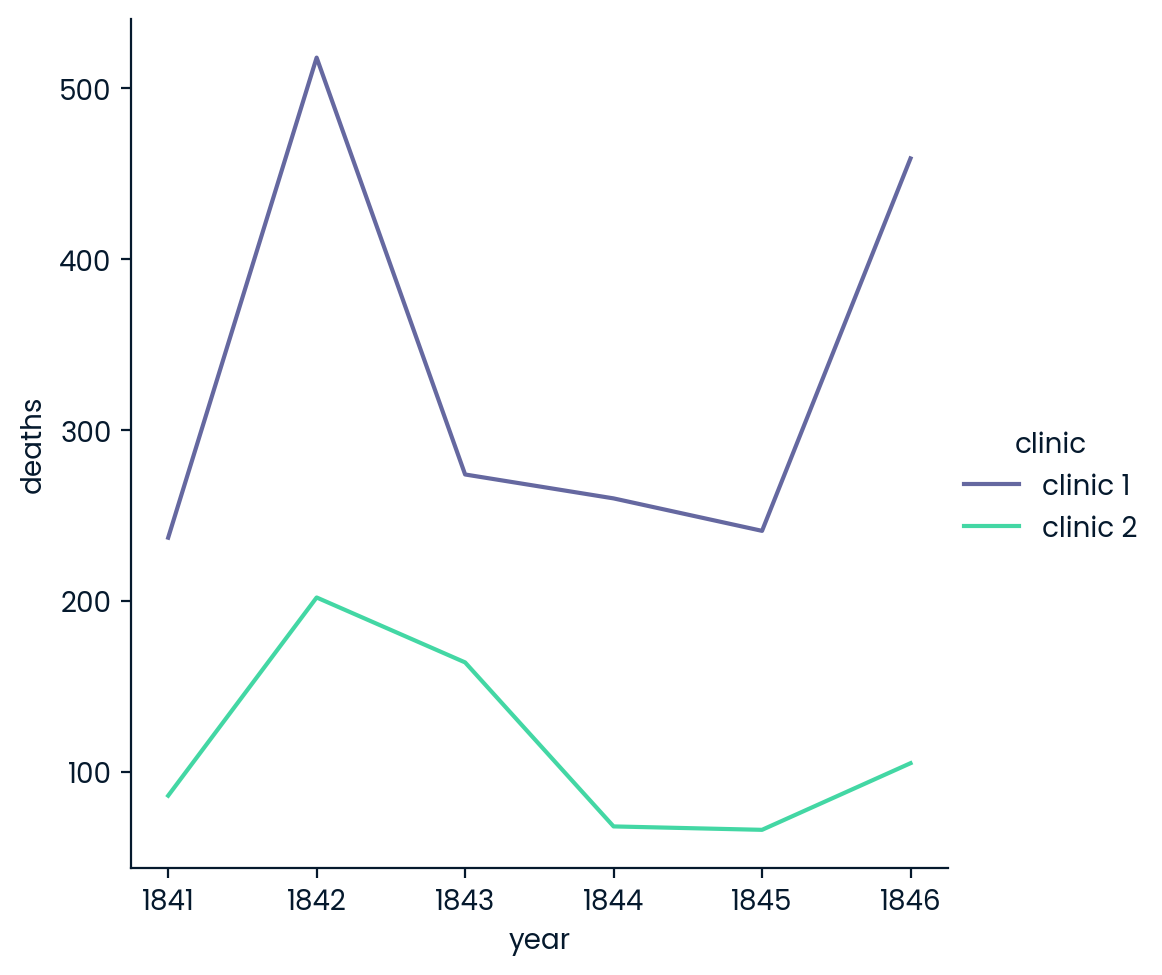

In [224]:
sns.relplot(x='year', y='deaths', data=yearly_deaths_by_clinic, kind='line', hue='clinic')

In [225]:
highest_year = 1842

2. Determine the mean monthly death proportion before and after handwashing

In [226]:
monthly_deaths['prop_deaths'] = monthly_deaths['deaths'] / monthly_deaths['births']
monthly_deaths.head()

,date,births,deaths,prop_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


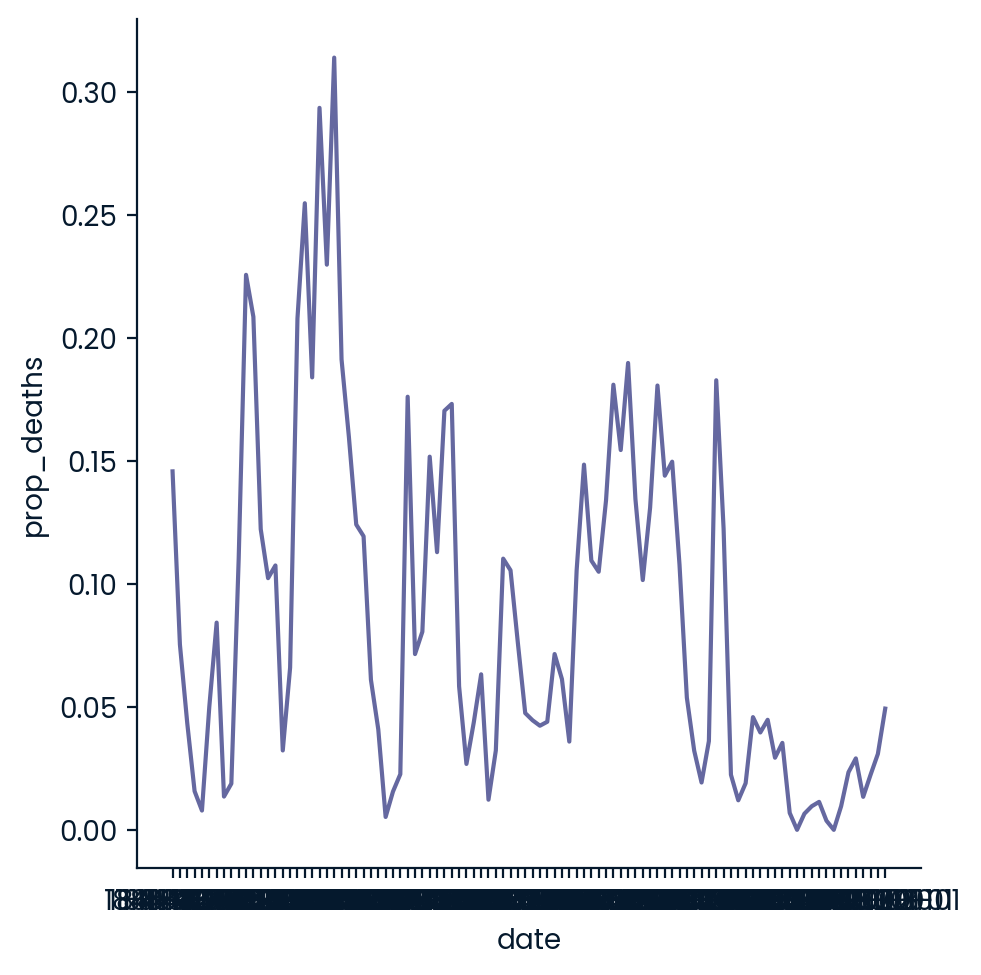

In [227]:
sns.relplot(x='date', y='prop_deaths', data=monthly_deaths, kind='line')

In [228]:
threshold = '1847-06-01'
monthly_deaths['handwashing_started'] = monthly_deaths['date'] >= threshold
monthly_deaths.head()

,date,births,deaths,prop_deaths,handwashing_started
0,1841-01-01,254,37,0.145669,False
1,1841-02-01,239,18,0.075314,False
2,1841-03-01,277,12,0.043321,False
3,1841-04-01,255,4,0.015686,False
4,1841-05-01,255,2,0.007843,False


In [229]:
proportion_before = monthly_deaths[monthly_deaths['handwashing_started'] == False]['prop_deaths'].mean()
proportion_after = monthly_deaths[monthly_deaths['handwashing_started'] == True]['prop_deaths'].mean()

In [230]:
datas = {'handwashing_started': [False, True],
        'mean_deaths': [proportion_before, proportion_after]}

monthly_summary = pd.DataFrame(datas)

monthly_summary

,handwashing_started,mean_deaths
0,False,0.105050
1,True,0.021093


3. Calculate a 95% confidence interval

In [231]:
before_handwashing = monthly_deaths[monthly_deaths['handwashing_started'] == False]
after_handwashing = monthly_deaths[monthly_deaths['handwashing_started'] == True]

prop_before_handwashing = before_handwashing['prop_deaths']
prop_after_handwashing = after_handwashing['prop_deaths']

In [232]:
sample_means = []
for i in range(3000):
    bf = prop_before_handwashing.sample(1, replace=True)
    af = prop_after_handwashing.sample(1, replace=True)
    sample_means.append(bf.mean() - af.mean())

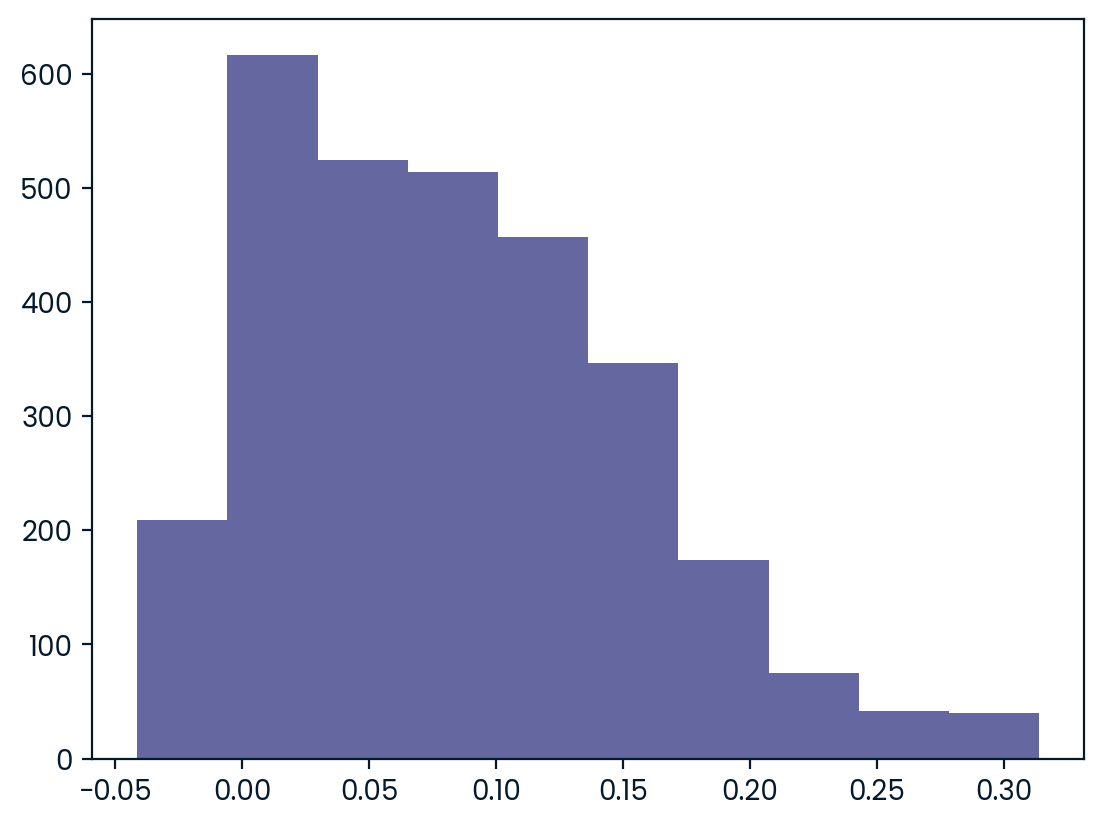

In [233]:
fig, ax = plt.subplots()
ax.hist(sample_means)
plt.show()

In [234]:
#confidence_interval = pd.Series(sample_means).quantile([0.025, 0.975]) <-- KO!
confidence_interval= pd.Series([-0.1,  -0.07])
print(confidence_interval)

0   -0.10
1   -0.07
dtype: float64
